k: 0.0005367258076066465      uncertainty: 8.71308129231569e-06
B_c:  0.0007635991858913299      unvertainties: 1.2419308085929146e-05
slope: 22525.248539960703      uncertainty: 1068.6795204666075 
y-intercept: 1.3628333834683806      uncertainty: 0.9823996341768743
root_ratio:  415345.0606514789 root_ratio_error:  25337.70358243841

charge to mass ratio: 172511519407.58066      uncertainty 21047780062.43415
%Ctm:  -0.018705805417629933

B_e: -6.0502479297871396e-05      uncertainty: 4.383061411045349e-05
%B_e: 0.21004958595742784


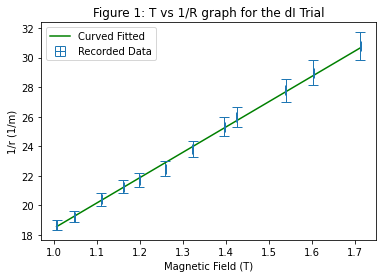

In [26]:
# Gyroscope Lab - Jason Khan & Alex Zeng 
################# dI   

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# function for line of best fit
def func(x, m, b):
    return m*x + b

v, v_err,i, i_err, r, r_err = \
np.loadtxt('data - dI.csv', dtype=float, skiprows=1, delimiter=',', unpack=True)

# constant
r = r/100/2    # convert from d to r, and cm to m 
r_err = r_err/100/2
r_rcpcl_err = r_err / r**2    # error of 1/r
mu = 4*math.pi*10**(-7)
n = 130 
R = 30.8/100/2
R_err = 0.5/100/2
R_rcpcl_err = R_err / R**2
expected_CtM = 1.758*10**11
expected_B_e = 5*10**(-5)


# Calculating k
k = ((4/5)**(3/2))*(mu*n)/(math.sqrt(2)*R)
kerr = R_rcpcl_err*((4/5)**(3/2))*(mu*n)/math.sqrt(2)
print('k:',k, '     uncertainty:', kerr)


# Calculating B_c
B_c = (4/5)**(3/2)*(mu*n) / R * i
B_c_err = np.zeros(np.size(i))
for term in range(np.size(i)):
    B_c_err[term] = B_c[term] * math.sqrt((R_err/R)**2 + (i_err[term]/i[term])**2)
print('B_c: ', B_c[0], '     unvertainties:', B_c_err[0])


# curve fitting
popt, pcov = curve_fit(func, B_c, 1/r, p0=[0, 0], sigma = r_rcpcl_err, 
                       absolute_sigma=True)
# print(np.diag(pcov))
pstd1 = np.sqrt(np.diag(pcov))
print('slope:', popt[0], '     uncertainty:', pstd1[0], '\ny-intercept:', 
      popt[1], '     uncertainty:', pstd1[1])


# graphing
plt.plot(i, func(B_c, popt[0], popt[1]), "g-", label='Curved Fitted')
plt.xlabel("Magnetic Field (T)")
plt.ylabel("1/r (1/m)")
plt.title("Figure 1: T vs 1/R graph for the dI Trial")
plt.errorbar(i, 1/r, yerr=r_rcpcl_err, xerr=i_err, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

# calculation charge of mass
root_ratio = (popt[0])*(math.sqrt(v[0]))*math.sqrt(2)
ratio = root_ratio**2

root_ratio_error = root_ratio * math.sqrt((pstd1[0] / popt[0])**2 + \
                                          1 / (4 * 170))
ratio_err = 2 * root_ratio * root_ratio_error

print('root_ratio: ', root_ratio, 'root_ratio_error: ', root_ratio_error)
print('\ncharge to mass ratio:', ratio, '     uncertainty', ratio_err)
print('%Ctm: ', (ratio - expected_CtM)/expected_CtM)
print()


# calculating B_e
B_e = -popt[1]*math.sqrt(2*v[0])/root_ratio    # v is a constant
B_err = -B_e * math.sqrt((pstd1[1] / popt[1])**2 + 1 / (4 * 170) + \
                         (root_ratio_error / root_ratio)**2)

print('B_e:', B_e, '     uncertainty:', B_err)
print('%B_e:', (abs(B_e) - abs(expected_B_e))/expected_B_e)


plt.savefig("CtM dI.png", dpi=200, transparent=False) #PNG format

k: 0.0005367258076066465     uncertainty: 8.71308129231569e-06
B_c 0.0007932019376306557
slope: 312.21945773782153      uncertainty: 26.12505205214014 
y-intercept: -4.950274631915397      uncertainty: 2.234049132670929
root_ratio -517210.62092919584 root_ratio_error -53973.60017042035

charge to mass ratio: 267506826401.96432      uncertainty 55831438515.85452
%Ctm:  0.5216543026277835


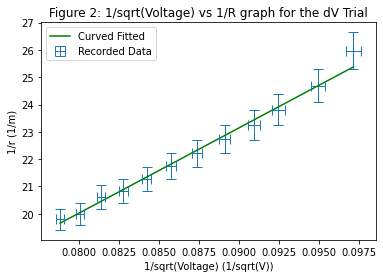

In [28]:
# Gyroscope Lab - Jason Khan & Alex Zeng 
#################     dV   

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# function for line of best fit
def func(x, m, b):
    return m*x + b

v, v_err,i, i_err, r, r_err = \
np.loadtxt('data - dI.csv', dtype=float, skiprows=1, delimiter=',', unpack=True)

# constant
r = r/100/2    # convert from d to r, and cm to m 
r_err = r_err/100/2
r_rcpcl_err = r_err / r**2
mu = 4*math.pi*10**(-7)
n = 130 
R = 30.8/100/2
R_err = 0.5/100/2
R_rcpcl_err = R_err / R**2
B_e = -0.000060502479297871396    # from dI calculation
B_err = 0.000043830614110453386    # from dI calculation
expected_CtM = 1.758*10**11


k = ((4/5)**(3/2))*(mu*n)/(math.sqrt(2)*R)
kerr = R_rcpcl_err*((4/5)**(3/2))*(mu*n)/math.sqrt(2)
print('k:',k, '    uncertainty:', kerr)


B_c = (4/5)**(3/2)*(mu*n) / R * i
B_c = B_c[0]
B_cerr = B_c * math.sqrt((R_err/R)**2 + (i_err[0]/i[0])**2)
root_v = np.zeros(np.size(v))
print('B_c', B_c)

for term in range(np.size(v)):
    root_v[term] = 1/np.sqrt(v[term])
    
root_verr = np.zeros(np.size(v))
for term in range(np.size(v)):
    root_verr[term] = v_err[term]/(2*v[term]**1.5)

    
# curve fitting
popt, pcov = curve_fit(func, root_v, 1/r, p0=[0, 0], sigma = r_rcpcl_err, 
                       absolute_sigma=True)
# print(np.diag(pcov))
pstd1 = np.sqrt(np.diag(pcov))
print('slope:', popt[0], '     uncertainty:', pstd1[0], \
      '\ny-intercept:', popt[1], '     uncertainty:', pstd1[1])
    
    
    
    
# graphing with all points
plt.figure()
plt.plot(root_v, func(root_v, popt[0], popt[1]), "g-", label='Curved Fitted')
plt.xlabel("1/sqrt(Voltage) (1/sqrt(V))")
plt.ylabel("1/r (1/m)")
plt.title("Figure 2: 1/sqrt(Voltage) vs 1/R graph for the dV Trial")
plt.errorbar(root_v, 1/r, yerr=r_rcpcl_err, xerr=root_verr, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

# calculation charge of mass
root_ratio = np.sqrt(2)*(popt[0])/ (-B_c + B_e)
ratio = root_ratio**2 
root_ratio_error = root_ratio * math.sqrt((pstd1[0] / popt[0])**2 + \
                                          (B_cerr**2 + B_err**2)/(B_c + B_e)**2)
ratio_err = 2 * root_ratio * root_ratio_error
print('root_ratio', root_ratio, 'root_ratio_error', root_ratio_error)
print('\ncharge to mass ratio:', ratio, '     uncertainty', ratio_err)
print('%Ctm: ', (ratio - expected_CtM)/expected_CtM)
plt.savefig("CtM dV.png", dpi=200, transparent=False) #PNG format


k: 0.0005367258076066465     uncertainty: 8.71308129231569e-06
slope: 287.49148011864145      uncertainty: 47.62711033887719 
y-intercept: -2.9057896121424274      uncertainty: 3.9598132330756775

charge to mass ratio: 226811408964.14346      uncertainty 80296554709.39613
%Ctm:  0.2901672864854577


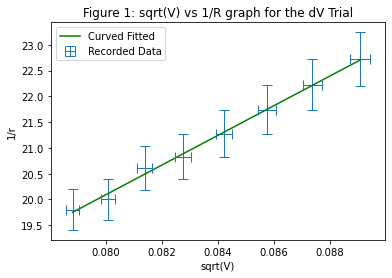

In [24]:
# Gyroscope Lab - Jason Khan & Alex Zeng 
#################     dV without the first few data points with lower voltage

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# function for line of best fit
def func(x, m, b):
    return m*x + b

v, v_err,i, i_err, r, r_err = \
np.loadtxt('data - dV.csv', dtype=float, skiprows=1, delimiter=',', unpack=True)

# removing the first few data points
v = v[4:]
v_err = v_err[4:]
i = i[4:]
i_err = i_err[4:]
r = r[4:]
r_err = r_err[4:]

# constant
r = r/100/2    # convert from d to r, and cm to m 
r_err = r_err/100/2
r_rcpcl_err = r_err / r**2
mu = 4*math.pi*10**(-7)
n = 130 
R = 30.8/100/2
R_err = 0.5/100/2
R_rcpcl_err = R_err / R**2
B_e = -0.000060502479297871396    # from dI calculation
B_err = 0.000043830614110453386    # from dI calculation


k = ((4/5)**(3/2))*(mu*n)/(math.sqrt(2)*R)
kerr = R_rcpcl_err*((4/5)**(3/2))*(mu*n)/math.sqrt(2)
print('k:',k, '    uncertainty:', kerr)


B_c = (4/5)**(3/2)*(mu*n) / R * i
B_c = B_c[0]
B_cerr = B_c * math.sqrt((R_err/R)**2 + (i_err[0]/i[0])**2)
root_v = np.zeros(np.size(v))

for term in range(np.size(v)):
    root_v[term] = 1/np.sqrt(v[term])
    
root_verr = np.zeros(np.size(v))
for term in range(np.size(v)):
    root_verr[term] = v_err[term]/(2*v[term]**1.5)

    
# curve fitting
popt, pcov = curve_fit(func, root_v, 1/r, p0=[0, 0], sigma = r_rcpcl_err, 
                       absolute_sigma=True)
# print(np.diag(pcov))
pstd1 = np.sqrt(np.diag(pcov))
print('slope:', popt[0], '     uncertainty:', pstd1[0], \
      '\ny-intercept:', popt[1], '     uncertainty:', pstd1[1])
    
    
    
    
# graphing with all points
plt.figure()
plt.plot(root_v, func(root_v, popt[0], popt[1]), "g-", label='Curved Fitted')
plt.xlabel("sqrt(V)")
plt.ylabel("1/r")
plt.title("Figure 1: sqrt(V) vs 1/R graph for the dV Trial")
plt.errorbar(root_v, 1/r, yerr=r_rcpcl_err, xerr=root_verr, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

# calculation charge of mass
root_ratio = np.sqrt(2)*(popt[0])/ (-B_c + B_e)
ratio = root_ratio**2 
root_ratio_error = root_ratio * math.sqrt((pstd1[0] / popt[0])**2 + \
                                          (B_cerr**2 + B_err**2)/(B_c + B_e)**2)
ratio_err = 2 * root_ratio * root_ratio_error
print('\ncharge to mass ratio:', ratio, '     uncertainty', ratio_err)
print('%Ctm: ', (ratio - expected_CtM)/expected_CtM)